In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 261 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [23]:
M.clear_filters().filter_strs('!test')

# M.filter_datasets( 'redball', 'rgbball', '3dshapes')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
# M.filter_jobs(169)
M.filter_jobs(178)
# M.filter_jobs(174, 175)
# M.filter_models('vae')
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date')
pass
M.show()


  0) noisy-3dshapes-wae_0177-6015622-00_200124-214603
  1) nocap-wae_0177-6015622-01_200124-215719
  2) nocap-vae_0177-6015622-03_200124-215927
  3) nocap-wae_0177-6015622-02_200124-215927
  4) nocap-vae_0177-6015622-04_200124-220016
  5) nocap-fwae_0177-6015622-05_200124-220310
  6) nocap-fwae_0177-6015622-06_200124-220621
  7) nocap-fvae_0177-6015622-07_200124-220838
  8) nocap-dwae_0177-6015622-09_200124-222143
  9) nocap-fdwae_0177-6015622-10_200124-222341
 10) nocap-fdwae_0177-6015622-11_200124-222419


In [24]:
# M.prep_info(100)
M.prep_info()

Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:66: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs


In [25]:
M.show('all')

  0) noisy-3dshapes-wae_0177-6015622-00_200124-214603
	Checkpoint: 100
	model.latent_dim - 12 (16)

  1) nocap-wae_0177-6015622-01_200124-215719
	Checkpoint: 100
	model.latent_dim - 12 (16)

  2) nocap-vae_0177-6015622-03_200124-215927
	Checkpoint: 100
	model.latent_dim - 12 (16)

  3) nocap-wae_0177-6015622-02_200124-215927
	Checkpoint: 100
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 0 (100)

  4) nocap-vae_0177-6015622-04_200124-220016
	Checkpoint: 100
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 4 (1)

  5) nocap-fwae_0177-6015622-05_200124-220310
	Checkpoint: 100
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)

  6) nocap-fwae_0177-6015622-06_200124-220621
	Checkpoint: 100
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 10000 (100)
	model.reg_prior - 0.01 (0.5)

  7) nocap-fvae_0177-6015622-07_200124-220838
	Checkpoint: 100
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 2 (1)

  8) nocap-dwae_0177-6015622-09_200124-2221

In [26]:
M.clear_run_cache()

In [27]:
run = M[0]
run.name

'noisy-3dshapes-wae_0177-6015622-00_200124-214603'

In [28]:
S = run.reset()

In [29]:
S.A = train.get_config()
S.A.dataset.name = '3dshapes'
S.A.dataset.kwargs = {}

In [ ]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/noisy-3dshapes-wae_0177-6015622-00_200124-214603/checkpoint_100.pth.tar
True


In [13]:

run.run(pbar=tqdm)

Using batched data loader
valset: 38400
Using batched data loader



torch.Size([38400, 12])
Storing validation set latent vectors


In [14]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/cyl-wae_0178-6017981-00_200125-221552/checkpoint_397.pth.tar'

In [15]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


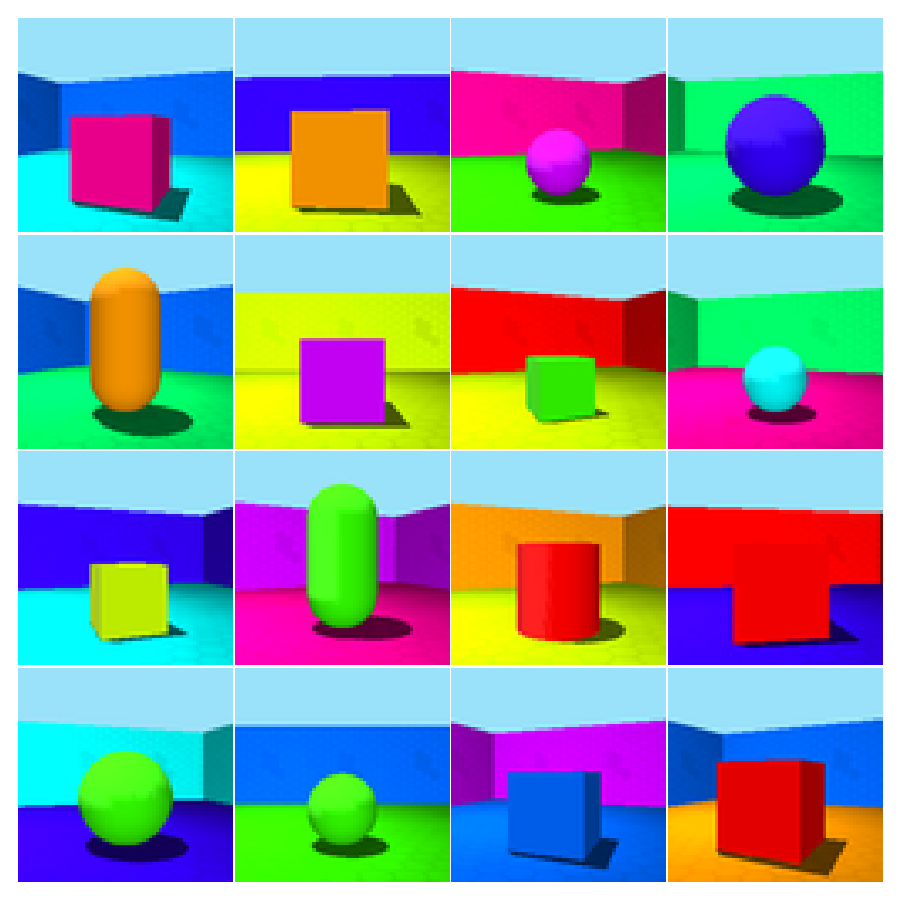

In [16]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


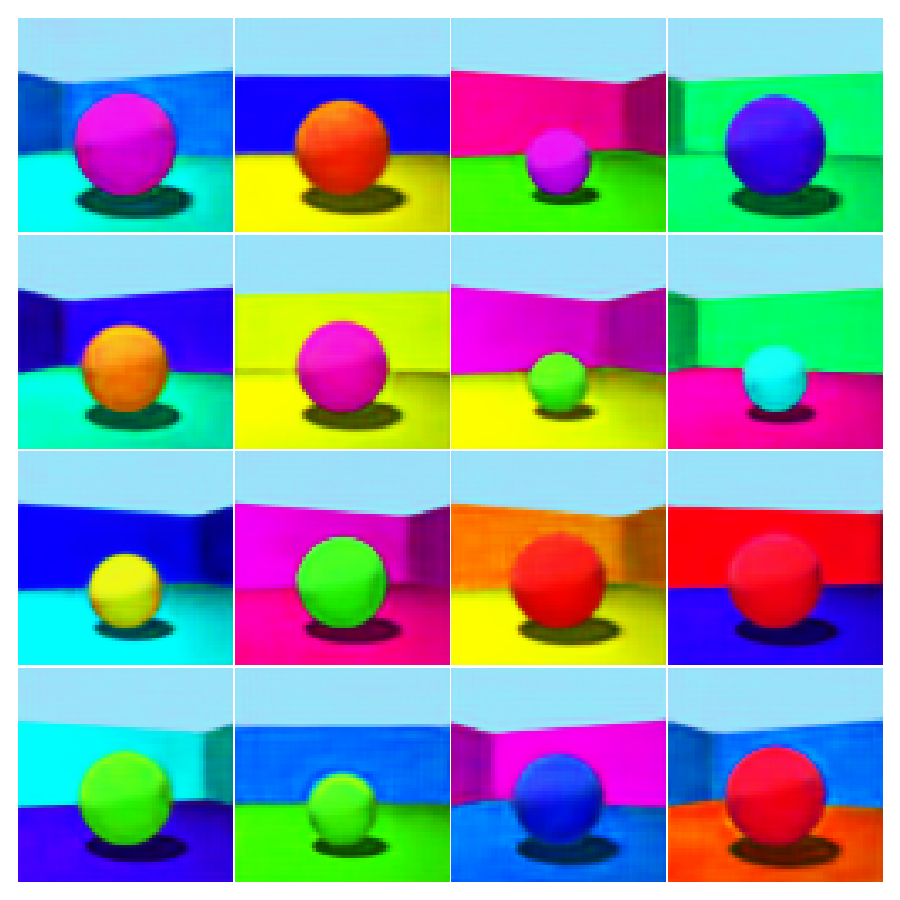

In [17]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


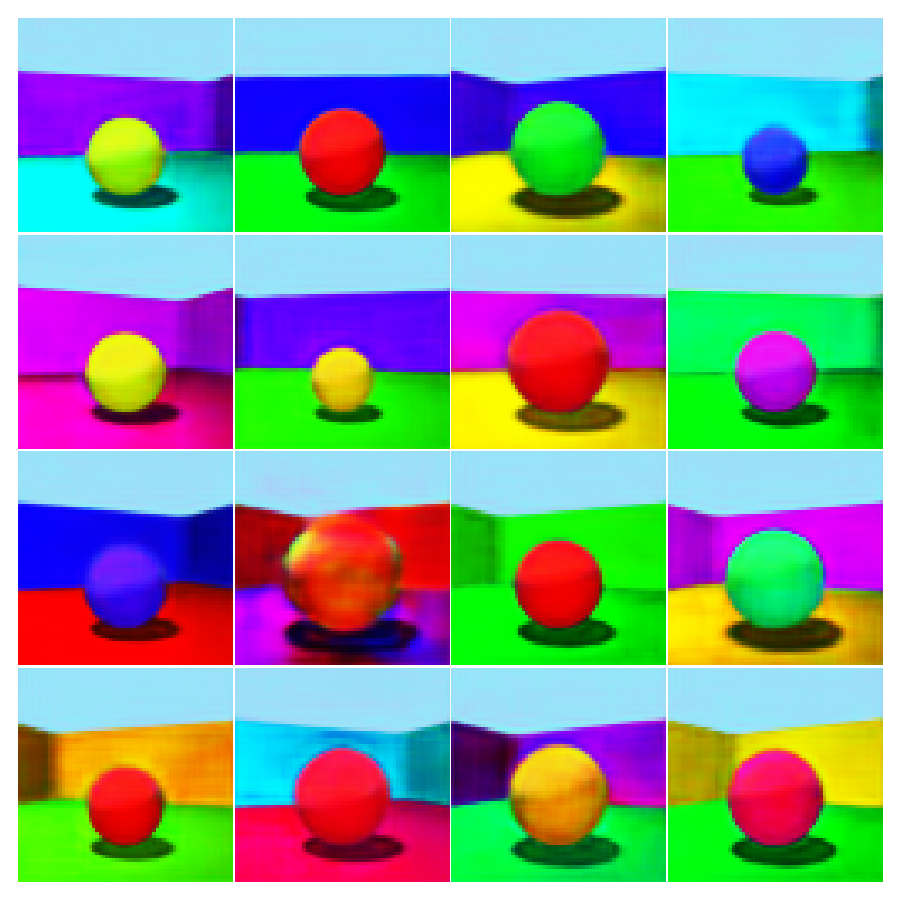

In [18]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


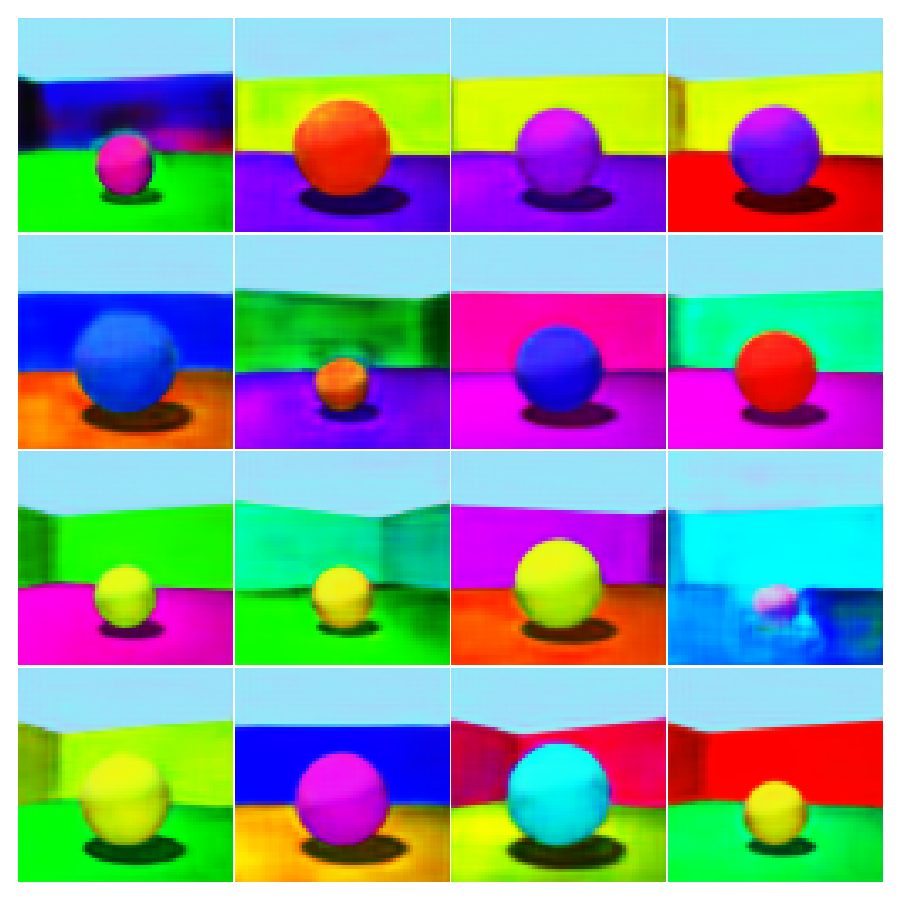

In [19]:
viz['gens'][0].view(scale=2)

In [20]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


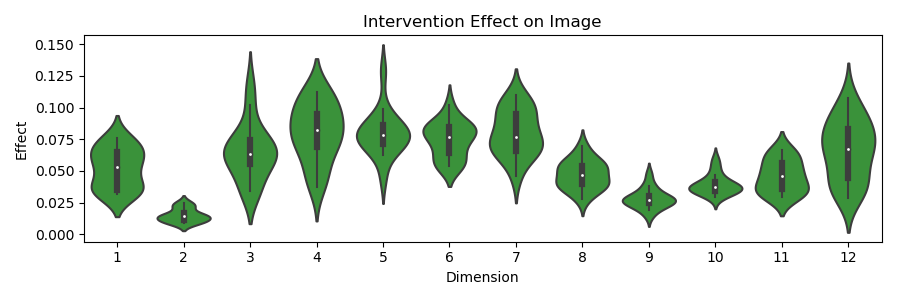

In [21]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


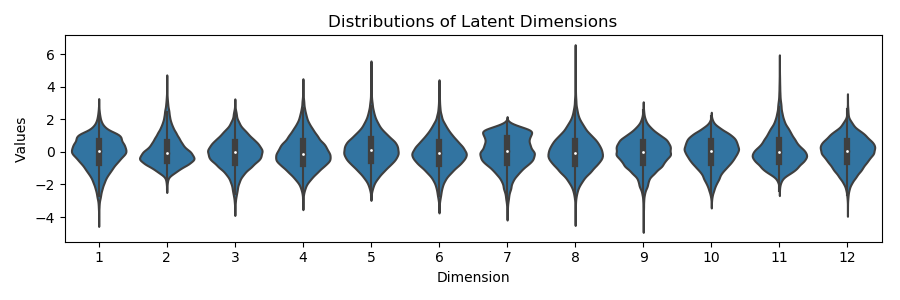

In [22]:
fig = viz['latent'][0].view(scale=2)
# plt.figure(fig.number)
# ax = fig.get_axes()[0]
# ax.set_ylim(-3, 3)
fig

In [ ]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-8a572dc4623f>", line 1, in <module>
    evals = run.evaluate(pbar=tqdm)
  File "/is/ei/fleeb/workspace/foundation/foundation/train/analysis.py", line 120, in evaluate
    results[k] = fn(self.state, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/analyze.py", line 657, in _top_fn
    S.fid_gen_stats[gen_type] = compute_inception_stat(generate, inception=inception, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py", line 123, in compute_inception_stat
    pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 

KeyboardInterrupt: 

> /is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py(123)compute_inception_stat()
    121                         pred = adaptive_avg_pool2d(pred, output_size=(1, 1))
    122 
--> 123                 pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
    124 
    125                 j += N



In [19]:
update_checkpoint(S, 'evals', overwrite=True)

Updated 1 keys: ['evals']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-05_200122-210402/checkpoint_100.pth.tar


In [20]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [21]:
# S.keys()

In [22]:
# S.hello = 'world'

In [23]:
# update_checkpoint(S, 'hello')

In [24]:
# viz_

In [25]:
# S.fid_gen_stats.keys()

In [26]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [27]:
# import pickle

In [28]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [29]:
# f

In [30]:
# run.state.keys()

In [31]:
# model = run.state.model

In [32]:
# q = run.state.q
# q.shape

In [33]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [34]:
# show_nums(imgs)

In [20]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/results/'
# run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/results/3dshapes-dwae_0174-6007668-11_200122-210934_ckpt100
	Model saved
	Config saved
	Visualization saved


'/is/ei/fleeb/workspace/media/hybrid/results/3dshapes-dwae_0174-6007668-11_200122-210934_ckpt100'